In [1]:
import pandas as pd
import numpy as np

np.set_printoptions(precision = 3)
pd.set_option('display.precision',3)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('whitegrid')

# 타자

## 먼저, 조유림 학회원의 data import

In [2]:
private_batter = pd.read_csv('C:/big_contest_2020_summer/eda_data/private_batter.csv') # 조유림 학회원

In [3]:
private_batter

,GDAY_DS,T_ID,VS_T_ID,TB_SC,P_ID,PA,AB,RUN,HIT,H2,...,IB,HP,KK,GD,ERR,LOB,AVG,OBP,SB_trial,SB_SR
0,20160401,HH,LG,T,60404,1,1,0,1,0,...,0,0,0,0,0,1,1.000,1.000,0,0.0
1,20160401,LG,HH,B,61102,3,3,0,0,0,...,0,0,2,0,0,0,0.000,0.000,0,0.0
2,20160401,LG,HH,B,61186,4,4,2,3,0,...,0,0,1,0,0,0,0.750,0.750,1,0.0
3,20160401,LG,HH,B,62164,1,0,0,0,0,...,0,0,0,0,0,0,0.000,1.000,0,0.0
4,20160401,HH,LG,T,62700,2,2,1,1,0,...,0,0,0,0,1,0,0.500,0.500,0,0.0
5,20160401,LG,HH,B,63077,0,0,0,0,0,...,0,0,0,0,0,0,0.000,0.000,0,0.0
6,20160401,LG,HH,B,63123,3,2,0,0,0,...,0,0,1,0,0,0,0.000,0.333,0,0.0
7,20160401,HH,LG,T,64086,6,4,0,0,0,...,0,0,3,0,0,1,0.000,0.167,0,0.0
8,20160401,LG,HH,B,64153,1,1,0,1,1,...,0,0,0,0,0,1,1.000,1.000,0,0.0
9,20160401,LG,HH,B,65103,5,5,0,1,1,...,0,0,0,0,0,1,0.200,0.200,0,0.0


## 홍익선 학회원의 파생변수 중에 반영이 된 것도 있고 안 된것도 있다.

### 반영되지 않은 것을 여기서 내가 반영한다.

EDA_hong.ipynb

### 홍익선 학회원의 추가 파생변수 중 반영해야 할 것 (반영되지 않은 것)

1) 장타율 SLG

2) OPS OPS

3) GPA : (1.8*출루율 + 장타력)/4

In [4]:
private_batter.columns

Index(['GDAY_DS', 'T_ID', 'VS_T_ID', 'TB_SC', 'P_ID', 'PA', 'AB', 'RUN', 'HIT',
       'H2', 'H3', 'HR', 'SB', 'CS', 'SH', 'SF', 'BB', 'IB', 'HP', 'KK', 'GD',
       'ERR', 'LOB', 'AVG', 'OBP', 'SB_trial', 'SB_SR'],
      dtype='object')

In [5]:
## 장타율
private_batter["SLG"]=(private_batter["HIT"] + 2*private_batter["H2"] + 3*private_batter["H3"] + 4*private_batter["HR"])/private_batter["AB"]
private_batter['SLG'].fillna(0, inplace=True)
private_batter[["HIT","H2","H3","HR","AB","SLG"]]

,HIT,H2,H3,HR,AB,SLG
0,1,0,0,0,1,1.000
1,0,0,0,0,3,0.000
2,3,0,0,1,4,1.750
3,0,0,0,0,0,0.000
4,1,0,0,0,2,0.500
5,0,0,0,0,0,0.000
6,0,0,0,0,2,0.000
7,0,0,0,0,4,0.000
8,1,1,0,0,1,3.000
9,1,1,0,0,5,0.600


In [6]:
## OPS = OBP(출루율) + SLG(장타율)

private_batter["OPS"]=private_batter["OBP"]+private_batter["SLG"]
private_batter[["OBP","SLG","OPS"]]

,OBP,SLG,OPS
0,1.000,1.000,2.000
1,0.000,0.000,0.000
2,0.750,1.750,2.500
3,1.000,0.000,1.000
4,0.500,0.500,1.000
5,0.000,0.000,0.000
6,0.333,0.000,0.333
7,0.167,0.000,0.167
8,1.000,3.000,4.000
9,0.200,0.600,0.800


In [7]:
## GPA = (1.8*출루율 + 장타력)/4

private_batter["GPA"]=(1.8*private_batter["OBP"] + private_batter["SLG"])/4
private_batter[["OBP","SLG","GPA"]]

,OBP,SLG,GPA
0,1.000,1.000,0.700
1,0.000,0.000,0.000
2,0.750,1.750,0.775
3,1.000,0.000,0.450
4,0.500,0.500,0.350
5,0.000,0.000,0.000
6,0.333,0.000,0.150
7,0.167,0.000,0.075
8,1.000,3.000,1.200
9,0.200,0.600,0.240


## correlation 분석

In [8]:
private_batter.columns

Index(['GDAY_DS', 'T_ID', 'VS_T_ID', 'TB_SC', 'P_ID', 'PA', 'AB', 'RUN', 'HIT',
       'H2', 'H3', 'HR', 'SB', 'CS', 'SH', 'SF', 'BB', 'IB', 'HP', 'KK', 'GD',
       'ERR', 'LOB', 'AVG', 'OBP', 'SB_trial', 'SB_SR', 'SLG', 'OPS', 'GPA'],
      dtype='object')

In [9]:
private_batter.head()

,GDAY_DS,T_ID,VS_T_ID,TB_SC,P_ID,PA,AB,RUN,HIT,H2,...,GD,ERR,LOB,AVG,OBP,SB_trial,SB_SR,SLG,OPS,GPA
0,20160401,HH,LG,T,60404,1,1,0,1,0,...,0,0,1,1.00,1.00,0,0.0,1.00,2.0,0.700
1,20160401,LG,HH,B,61102,3,3,0,0,0,...,0,0,0,0.00,0.00,0,0.0,0.00,0.0,0.000
2,20160401,LG,HH,B,61186,4,4,2,3,0,...,0,0,0,0.75,0.75,1,0.0,1.75,2.5,0.775
3,20160401,LG,HH,B,62164,1,0,0,0,0,...,0,0,0,0.00,1.00,0,0.0,0.00,1.0,0.450
4,20160401,HH,LG,T,62700,2,2,1,1,0,...,0,1,0,0.50,0.50,0,0.0,0.50,1.0,0.350


## numeric X variable candidates for modeling

: PA, AB, RUN, HIT, H2, H3, HR, SB, CS, SH, SF, BB, IB, HP, KK, GD, ERR, LOB, OBP, SB_trial, SB_SR, SLG, OPS, GPA

인 걸로 보인다만, 타율을 예측할 때, 설명변수로 타수, 총 안타수(1,2,3,4루타 합침)가 다 들어가면 절대 곤란하다.

왜냐하면, 타율은 총 안타 / 타수이기 때문이다.

수학적인 관계에 있는 변수들을 indep / dependent variable에 놓으면 다중공선성이 극심하다.

마치 미래 인구 / 1KM^2를 예측할 때, 도시 인구와 면적을 둘 다 설명변수로 놓는 것과 같은 문제라고 본다.

아님 BMI를 예측할 때 키, 몸무게를 둘 다 설명변수로 놓거나.

일단 새벽이라 두뇌 회전이 보통보다 떨어지므로 DECISION을 내리기가 쉽지 않다. 

고로, 문제 제기만 해 놓고 그림 그릴 때는 포함시킨다.

합의 하에 나중에 몇 개를 뺄 수 있겠다.

## categorical X variable candidates for modeling

:T_ID, VS_T_ID, TB_SC, (not GDAY_DS, P_ID : 레벨이 각 PLAYER, 경기마다로 무지 많음)

In [10]:
num_list = ['PA', 'AB', 'RUN', 'HIT',
       'H2', 'H3', 'HR', 'SB', 'CS', 'SH', 'SF', 'BB', 'IB', 'HP', 'KK', 'GD',
       'ERR', 'LOB','OBP', 'SB_trial', 'SB_SR', 'SLG', 'OPS', 'GPA']

In [11]:
private_batter[num_list]

,PA,AB,RUN,HIT,H2,H3,HR,SB,CS,SH,...,KK,GD,ERR,LOB,OBP,SB_trial,SB_SR,SLG,OPS,GPA
0,1,1,0,1,0,0,0,0,0,0,...,0,0,0,1,1.000,0,0.0,1.000,2.000,0.700
1,3,3,0,0,0,0,0,0,0,0,...,2,0,0,0,0.000,0,0.0,0.000,0.000,0.000
2,4,4,2,3,0,0,1,0,1,0,...,1,0,0,0,0.750,1,0.0,1.750,2.500,0.775
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.000,0,0.0,0.000,1.000,0.450
4,2,2,1,1,0,0,0,0,0,0,...,0,0,1,0,0.500,0,0.0,0.500,1.000,0.350
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000,0,0.0,0.000,0.000,0.000
6,3,2,0,0,0,0,0,0,0,0,...,1,0,0,0,0.333,0,0.0,0.000,0.333,0.150
7,6,4,0,0,0,0,0,0,0,1,...,3,0,0,1,0.167,0,0.0,0.000,0.167,0.075
8,1,1,0,1,1,0,0,0,0,0,...,0,0,0,1,1.000,0,0.0,3.000,4.000,1.200
9,5,5,0,1,1,0,0,0,0,0,...,0,0,0,1,0.200,0,0.0,0.600,0.800,0.240


### 이 절차를 내가 지난 학기 ESC 6조였을 때 겪은 바 있다. 

### 이 때 CORR MAT 그리는 것을 김진영 학회원이 수행하였고 그 SOURCE는 밑에 있다. 그 코드를 참조하였다
https://github.com/YonseiESC/ESC-20SPRING/blob/master/파이널%20프로젝트/6조/code/ESC2020SPR_FINAL_EDA_06032141.ipynb


In [12]:
# corr mat for batters

corrmat = private_batter[num_list].corr(method = 'pearson')

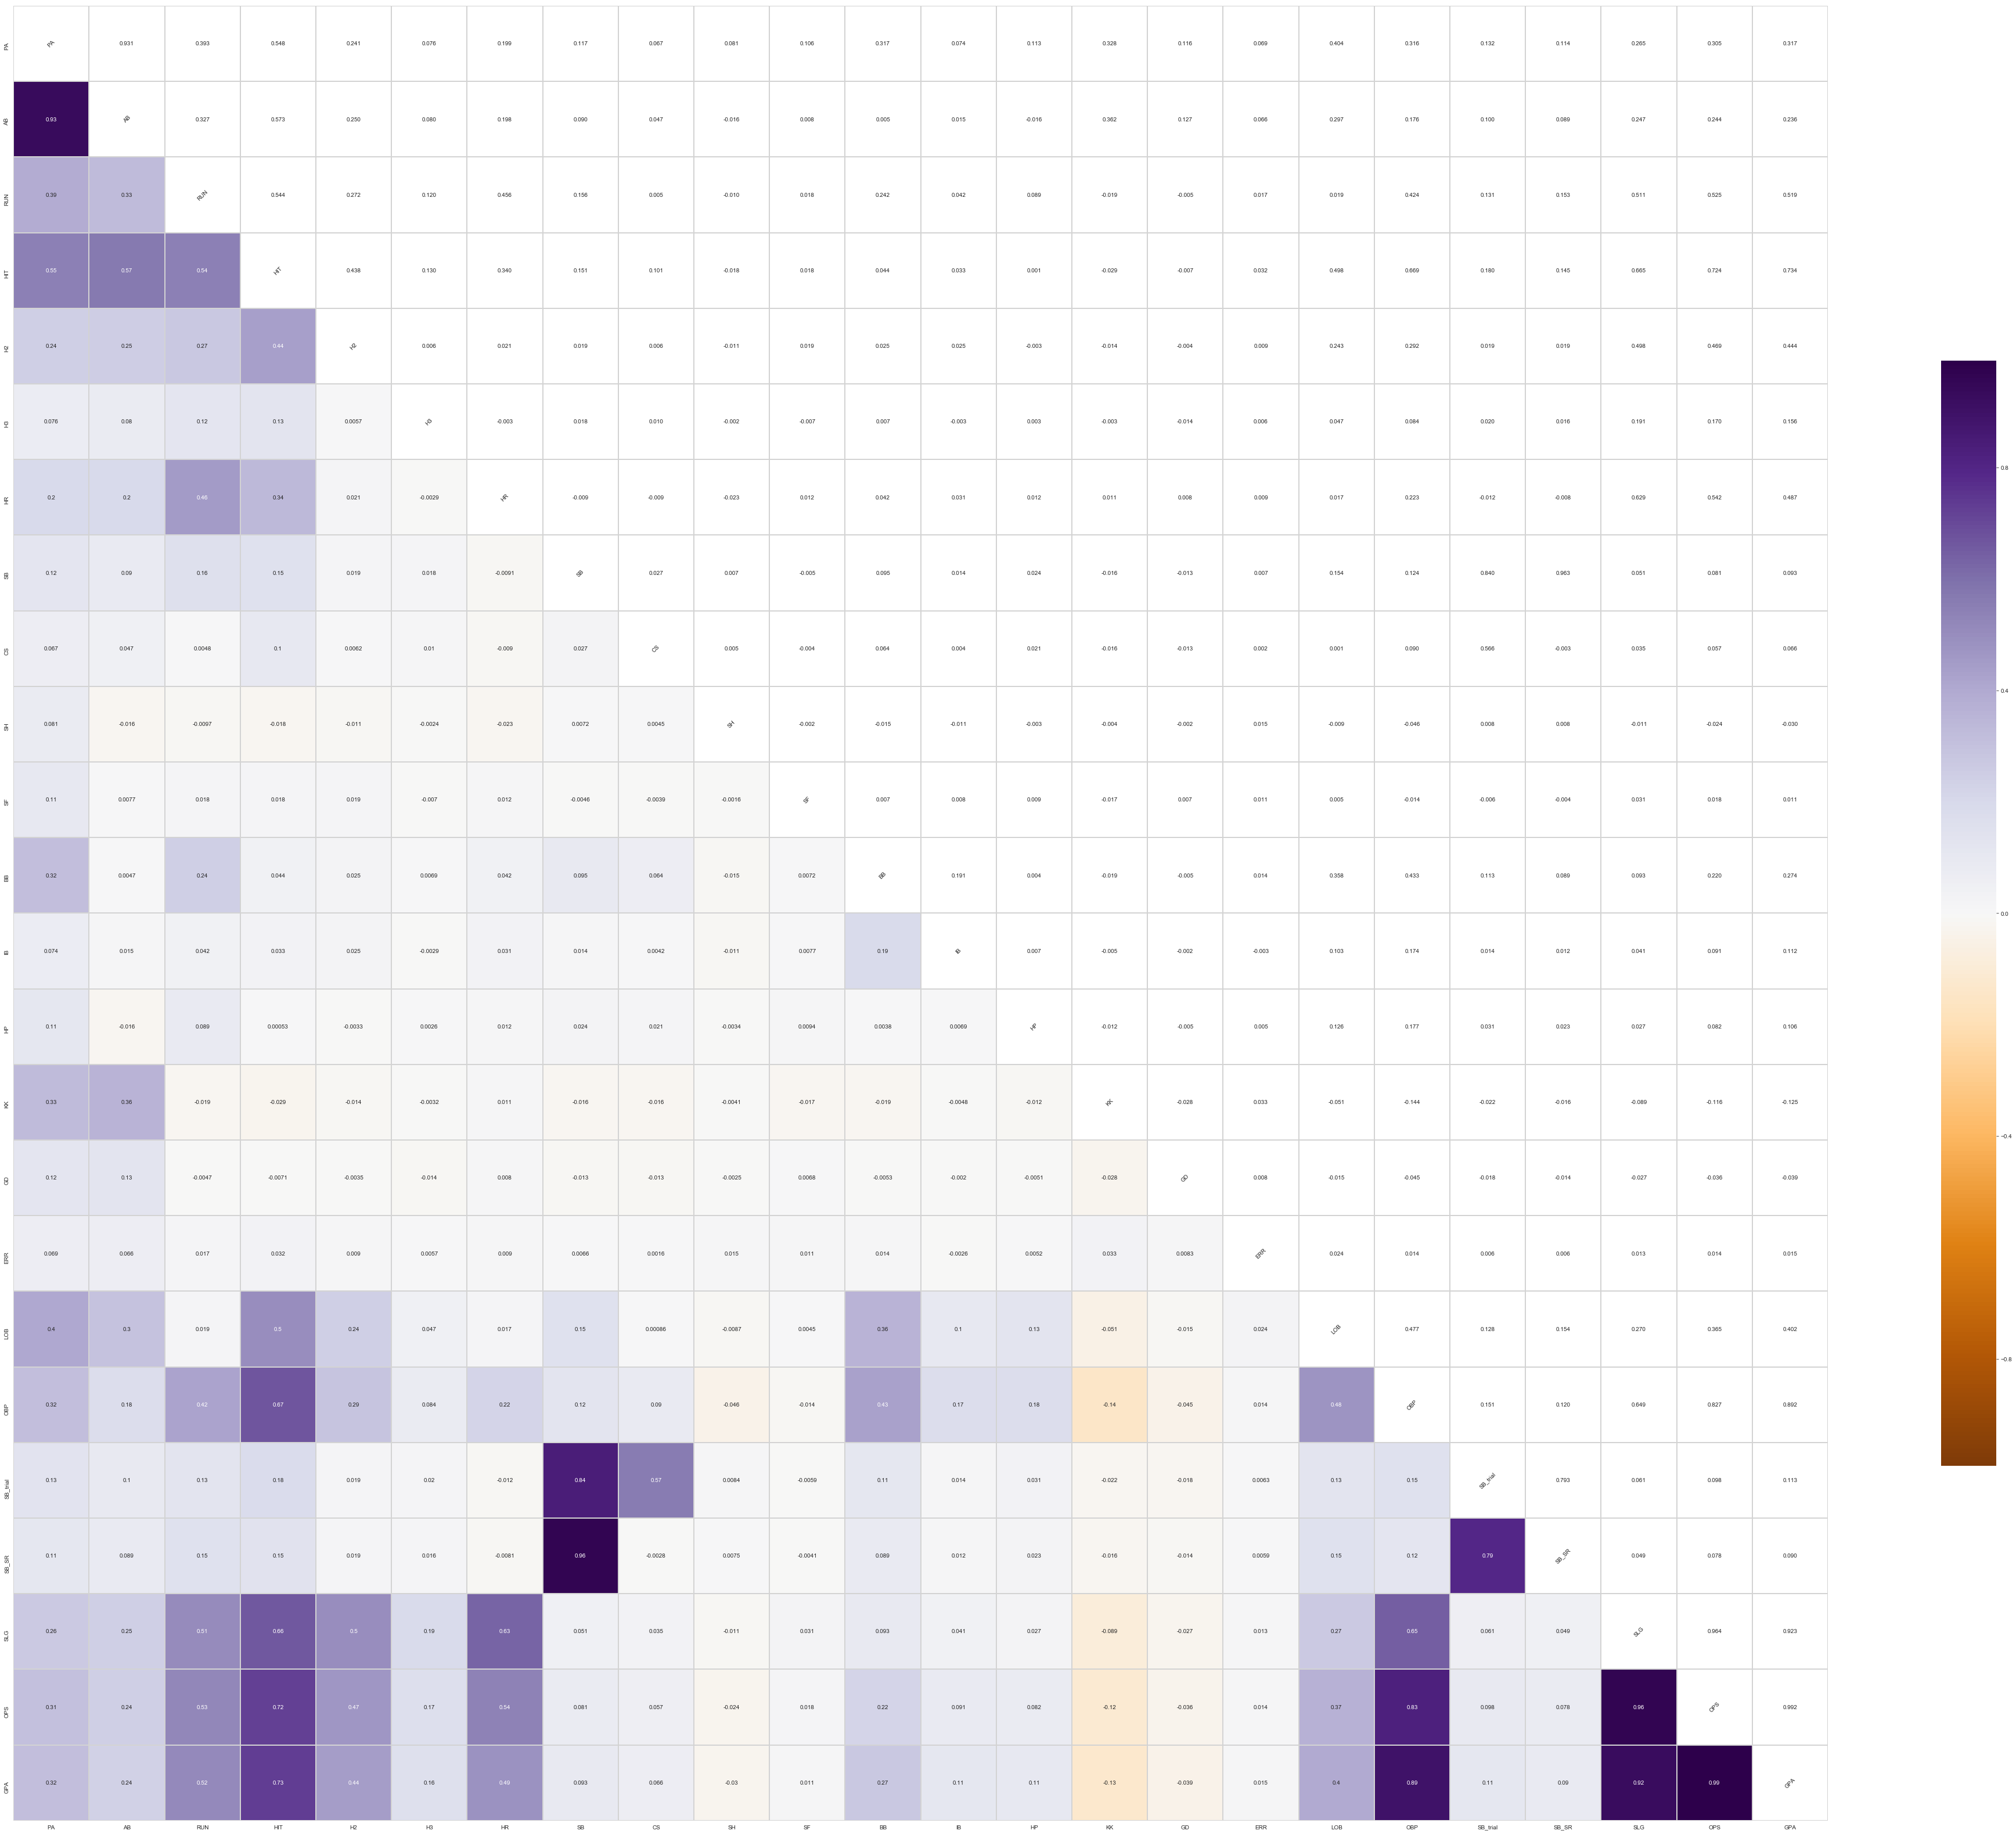

In [13]:
# upper triangular mat
mask = np.zeros_like(corrmat, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True

# figure setup
fig, ax = plt.subplots(figsize=(70,70)) # big figure

# Draw the heatmap 
vmax = np.abs(corrmat.values[~mask]).max()
sns.heatmap(corrmat, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax, annot=True,
            square=True, linecolor="lightgray", linewidths=1, ax=ax, cbar_kws={"shrink": .5})

for i in range(len(corrmat)): # 위치 조절
    ax.text(i+0.5,(i+0.5), corrmat.columns[i], 
            ha="center", va="center", rotation=45)
    for j in range(i+1, len(corrmat)):
        s = "{:.3f}".format(corrmat.values[i,j])
        ax.text(j+0.5,i+0.5,s, 
            ha="center", va="center")

plt.show()

# 분석

# 투수 

## 먼저 조유림 학회원의 data import

In [14]:
private_pitcher = pd.read_csv('C:/big_contest_2020_summer/eda_data/private_pitcher.csv') # 조유림 학회원

In [15]:
private_pitcher

,GDAY_DS,T_ID,VS_T_ID,TB_SC,P_ID,INN2,BF,PA,AB,HIT,...,H3,HR,SB,CS,BB,KK,WP,R,ER,ERA
0,20160401,LG,HH,B,60146,6,29,8,7,1,...,0,0,0,0,1,3,0,0,0,0.000
1,20160401,LG,HH,B,61891,5,33,8,6,2,...,0,0,0,0,1,1,0,0,0,0.000
2,20160401,LG,HH,B,62146,1,7,2,2,1,...,0,0,0,0,0,0,0,0,0,0.000
3,20160401,LG,HH,B,62698,18,94,28,25,9,...,0,0,0,0,1,4,0,4,4,0.667
4,20160401,HH,LG,T,65764,4,27,6,4,1,...,0,0,0,0,1,1,0,1,1,0.750
5,20160401,LG,HH,B,70839,3,11,3,3,0,...,0,0,0,0,0,1,0,0,0,0.000
6,20160401,LG,HH,B,71118,3,10,3,3,0,...,0,0,0,0,0,1,0,0,0,0.000
7,20160401,HH,LG,T,72447,6,29,7,7,1,...,0,0,1,0,0,2,0,0,0,0.000
8,20160401,HH,LG,T,73801,9,57,15,14,5,...,0,1,1,0,1,4,0,3,3,1.000
9,20160401,HH,LG,T,74731,1,18,3,2,1,...,0,0,0,0,1,1,0,1,0,0.000


In [16]:
private_pitcher.columns

Index(['GDAY_DS', 'T_ID', 'VS_T_ID', 'TB_SC', 'P_ID', 'INN2', 'BF', 'PA', 'AB',
       'HIT', 'H2', 'H3', 'HR', 'SB', 'CS', 'BB', 'KK', 'WP', 'R', 'ER',
       'ERA'],
      dtype='object')

## 여기서는 홍익선 학회원의 추가 파생변수 추가가 없으므로 바로 correlation 분석을 시행한다

## numeric X variable candidates for modeling

: INN2, BF, PA, AB, HIT, H2, H3, HR, SB, CS, BB, KK, WP, R, ER

## categorical X variable candidates for modeling

: T_ID, VS_T_ID, TB_SC, (not GDAY_DS, P_ID : 레벨이 각 PLAYER, 경기마다로 무지 많음)

In [17]:
num_list = ['INN2', 'BF', 'PA', 'AB',
       'HIT', 'H2', 'H3', 'HR', 'SB', 'CS', 'BB', 'KK', 'WP', 'R', 'ER']

In [18]:
# corr mat for pitchers

corrmat = private_pitcher[num_list].corr(method = 'pearson')

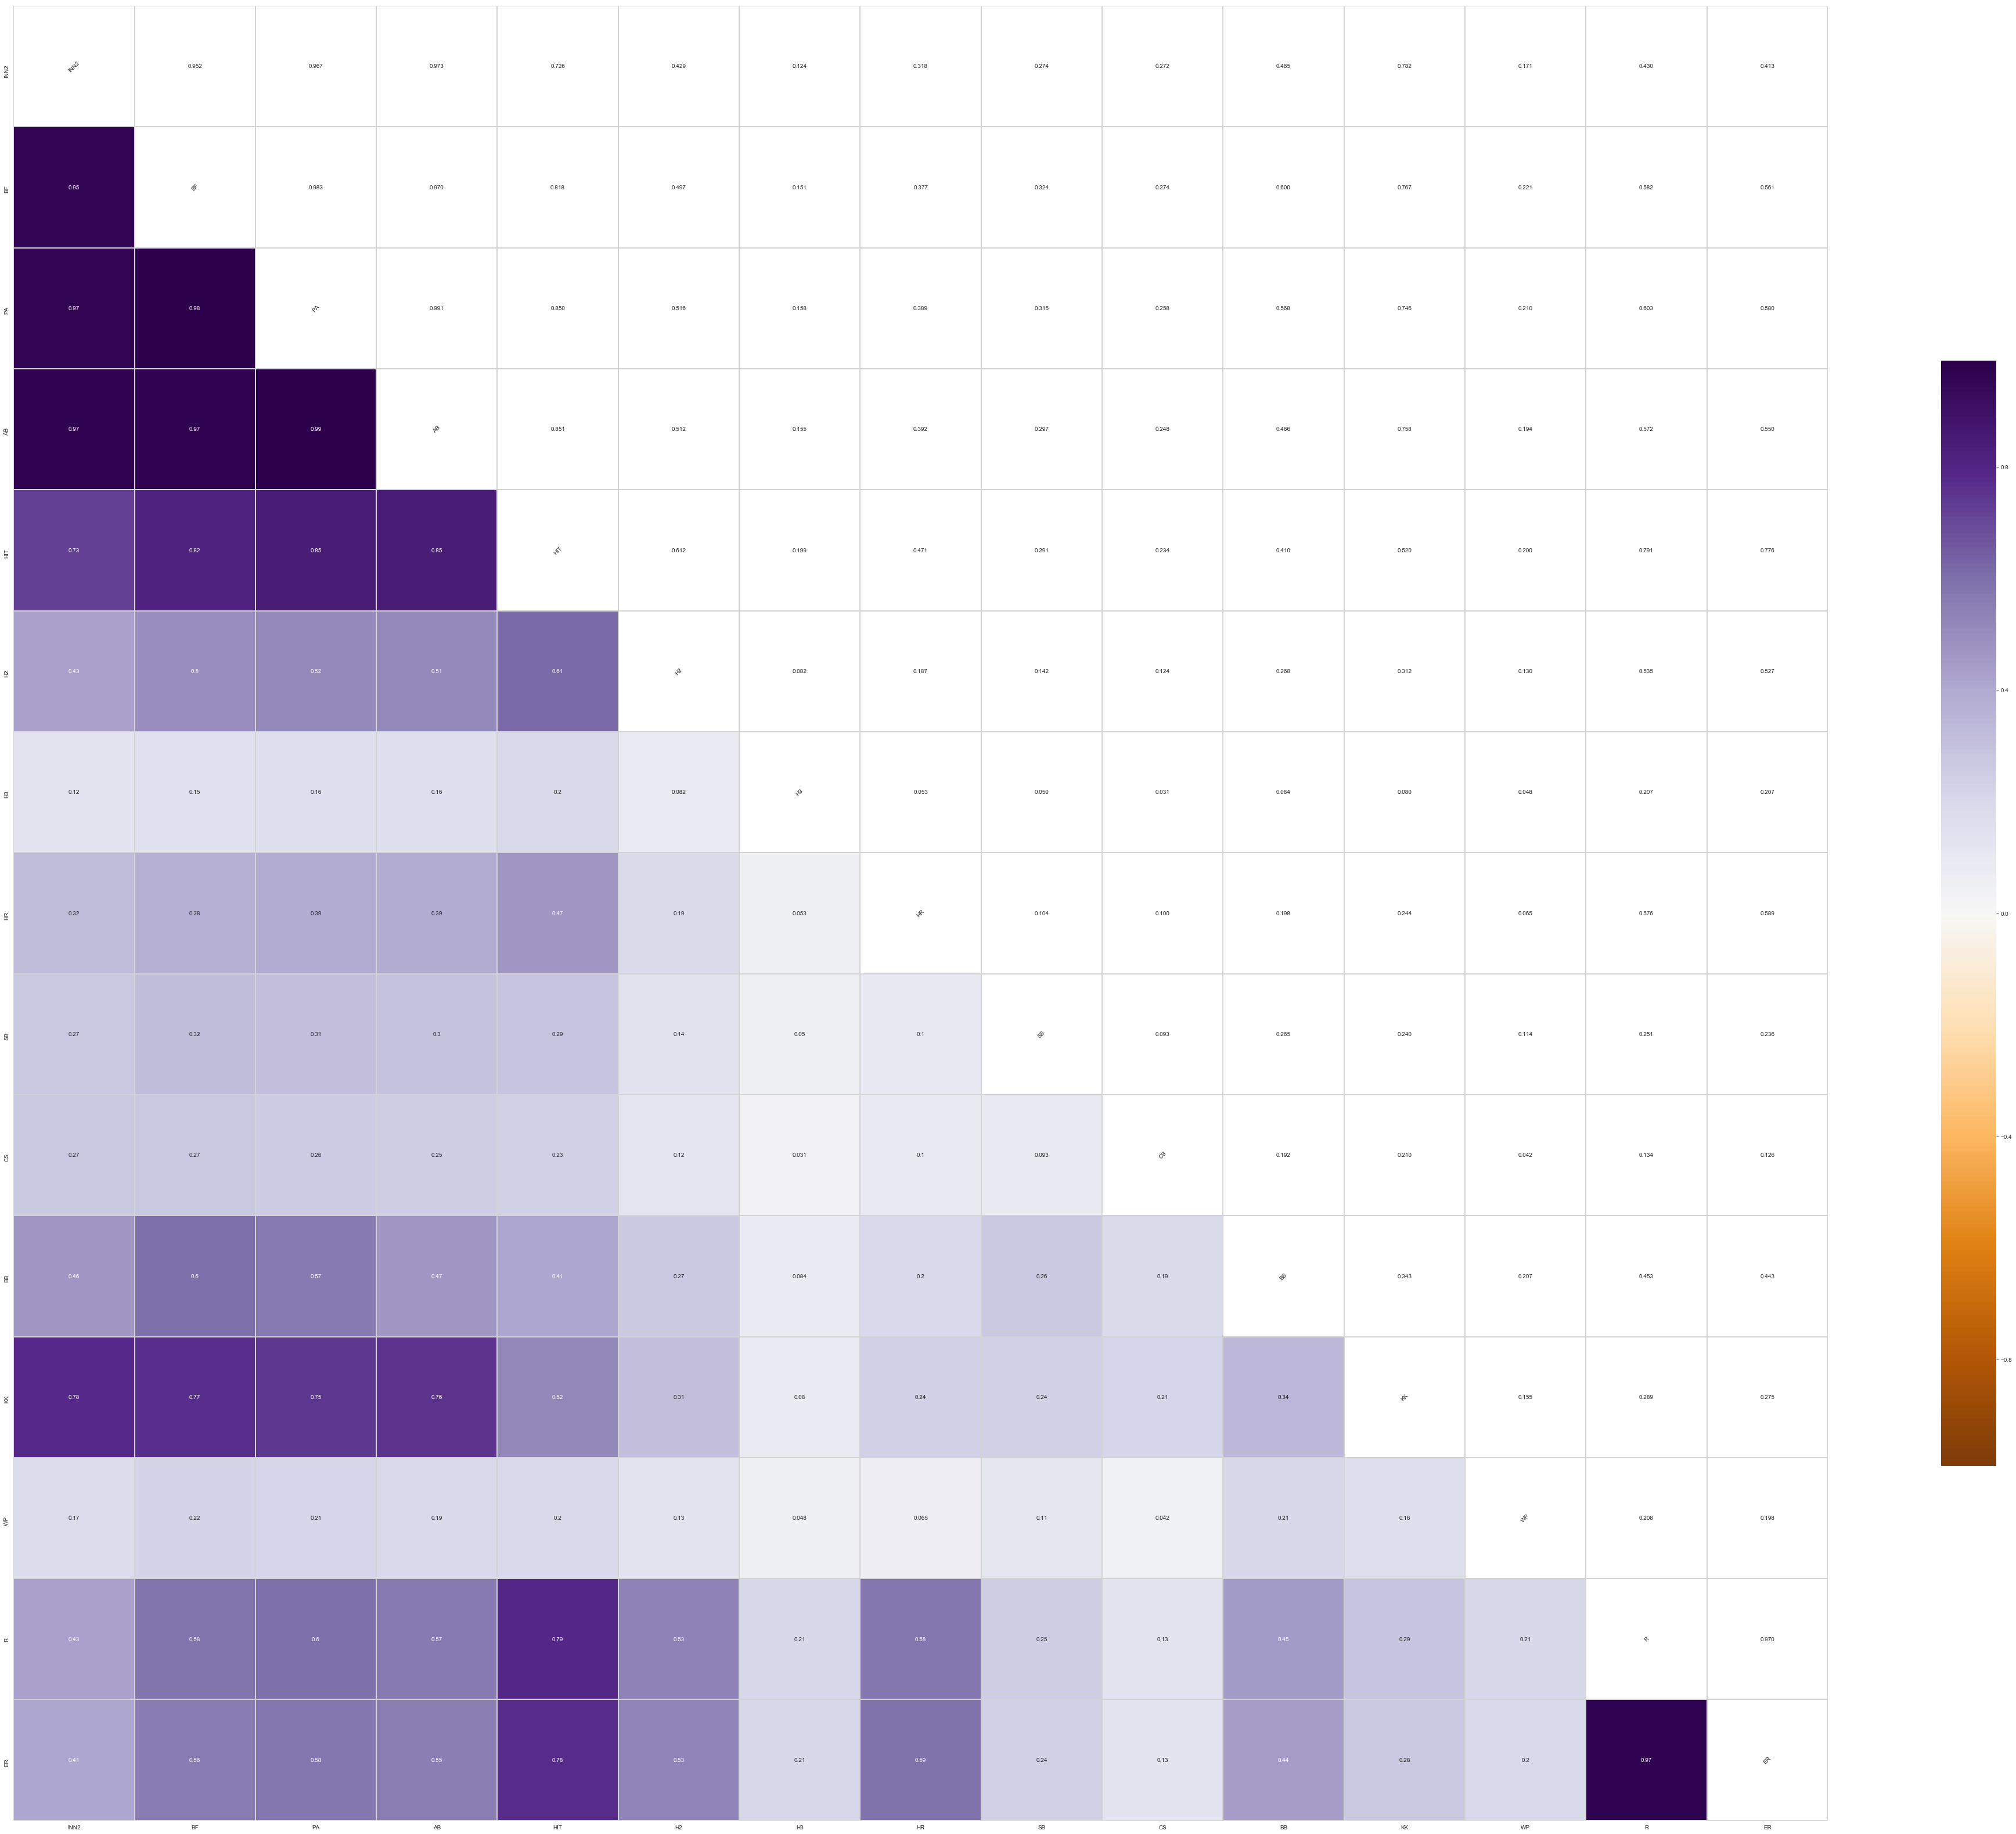

In [19]:
# upper triangular mat
mask = np.zeros_like(corrmat, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True

# figure setup
fig, ax = plt.subplots(figsize=(70,70)) # big figure

# Draw the heatmap 
vmax = np.abs(corrmat.values[~mask]).max()
sns.heatmap(corrmat, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax, annot=True,
            square=True, linecolor="lightgray", linewidths=1, ax=ax, cbar_kws={"shrink": .5})

for i in range(len(corrmat)): # 위치 조절
    ax.text(i+0.5,(i+0.5), corrmat.columns[i], 
            ha="center", va="center", rotation=45)
    for j in range(i+1, len(corrmat)):
        s = "{:.3f}".format(corrmat.values[i,j])
        ax.text(j+0.5,i+0.5,s, 
            ha="center", va="center")

plt.show()

# 타자 쪽에서 변수가 더해졌다. data를 새로 반영.

## to_csv 할 때 참 골치 아프다. 똑같은 제목의 private_batter에서 private_batter2, private_batter_final 이런 거 하기 싫어서 version control 하는 건데 똑같은 파일명으로 to_csv 하면 permissionerror 뜬다. (당연)

## 그러면 기존의 private_batter.csv를 삭제하고 to_csv할까? 그러면 reproducible하지 않은데? 기존의 private_batter는 이미 없어졌으니까 내 코드의 앞부분에서 read_csv할 때 내가 수정한 파일이 읽힐 것이다.

### 쉬운 해결책이 존재할 수도 있겠는데 지금은 머리 잘 안돌아가서 일단 다른 파일 이름으로 저장해서 기존의 private batter, 내 updated private batter 둘 다 보존시키도록 한다.


In [22]:
private_batter.to_csv('C:/big_contest_2020_summer/eda_data/private_batter_add_variables.csv', index = False)